In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter
from scipy.signal import butter, filtfilt
import os

In [9]:
dir_path = "/kaggle/input/sports-wav"
files = os.listdir(dir_path)
print(files)  # This will help you identify the correct filename

# Then read the specific .wav file
file_path = os.path.join(dir_path, "Sports.wav")  # Replace with actual filename
sample_rate, data = wavfile.read(file_path)

# If stereo, convert to mono
if len(data.shape) == 2:
    data = data.mean(axis=1)

# Get time array for plotting or analysis
duration = len(data) / sample_rate
time = np.linspace(0., duration, len(data))

['Sports.wav']


Files in directory: ['Sports.wav']
Reading file: /kaggle/input/sports-wav/Sports.wav


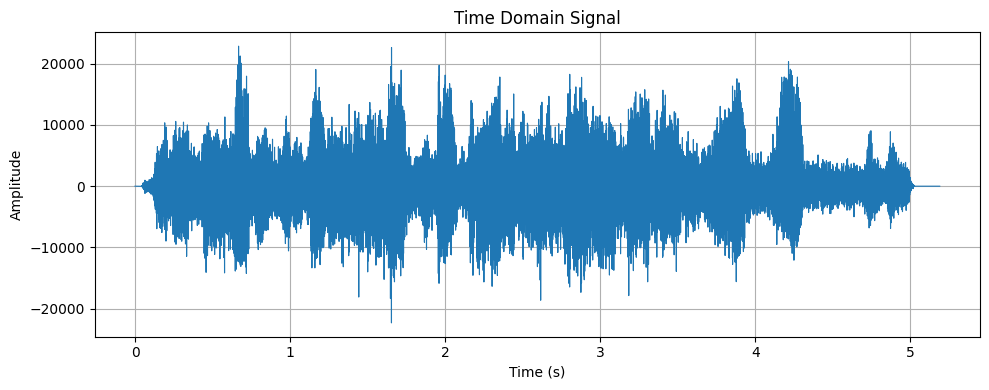

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Path to the dataset directory
dir_path = "/kaggle/input/sports-wav"

# List all files in the directory to find the .wav file
files = os.listdir(dir_path)
print("Files in directory:", files)

# Load the first WAV file found (you can change this logic as needed)
wav_files = [f for f in files if f.endswith(".wav")]
if not wav_files:
    raise FileNotFoundError("No .wav file found in the directory.")

file_path = os.path.join(dir_path, wav_files[0])
print(f"Reading file: {file_path}")

# Read the WAV file
sample_rate, data = wavfile.read(file_path)

# Convert to mono if stereo
if len(data.shape) == 2:
    data = data.mean(axis=1)

# Create time axis
t = np.arange(len(data)) / sample_rate

# Plot time-domain signal
plt.figure(figsize=(10, 4))
plt.plot(t, data, linewidth=0.8)
plt.title('Time Domain Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


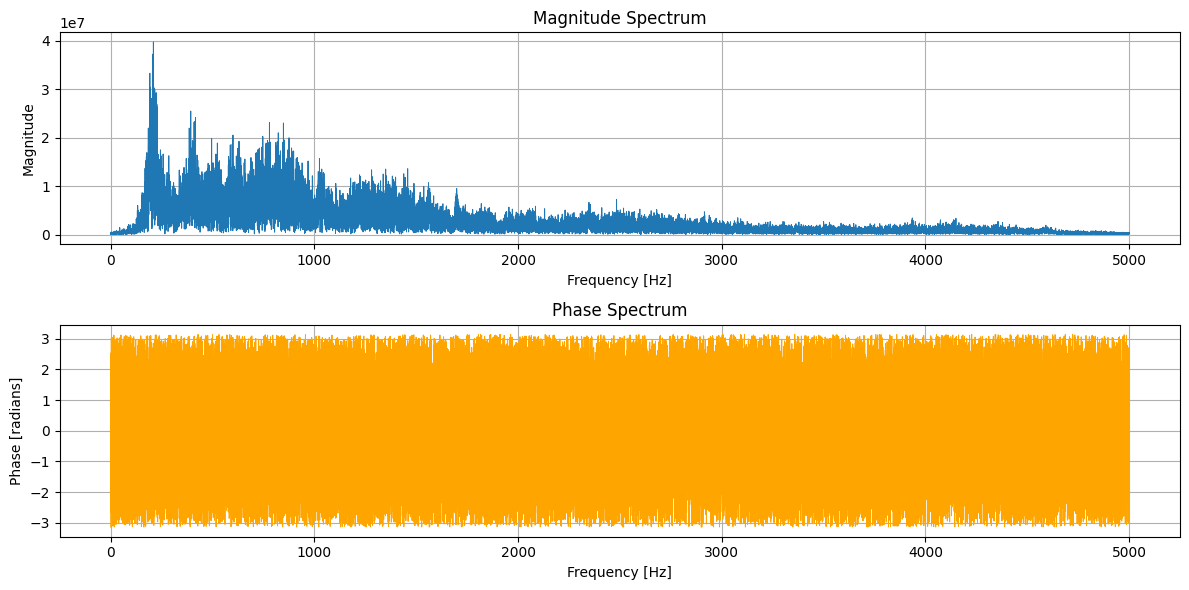

In [40]:
# Compute FFT
N = len(data)
fft_result = np.fft.fft(data)
freqs = np.fft.fftfreq(N, d=1/sample_rate)

# Keep only positive frequencies
pos_mask = freqs >= 0
freqs = freqs[pos_mask]
magnitude = np.abs(fft_result[pos_mask])
phase = np.angle(fft_result[pos_mask])

# Limit to 0–5000 Hz
limit_mask = freqs <= 5000
freqs = freqs[limit_mask]
magnitude = magnitude[limit_mask]
phase = phase[limit_mask]

# Plot Magnitude and Phase Spectrum
fig, axs = plt.subplots(2, 1, figsize=(12, 6))

axs[0].plot(freqs, magnitude, linewidth=0.7)
axs[0].set_title("Magnitude Spectrum")
axs[0].set_ylabel("Magnitude")
axs[0].set_xlabel("Frequency [Hz]")
axs[0].grid(True)

axs[1].plot(freqs, phase, linewidth=0.7, color='orange')
axs[1].set_title("Phase Spectrum")
axs[1].set_xlabel("Frequency [Hz]")
axs[1].set_ylabel("Phase [radians]")
axs[1].grid(True)

plt.tight_layout()
plt.show()


Estimated Voice Bandwidth: 2807.94 Hz
Frequency Range: 130.85 Hz to 2938.79 Hz


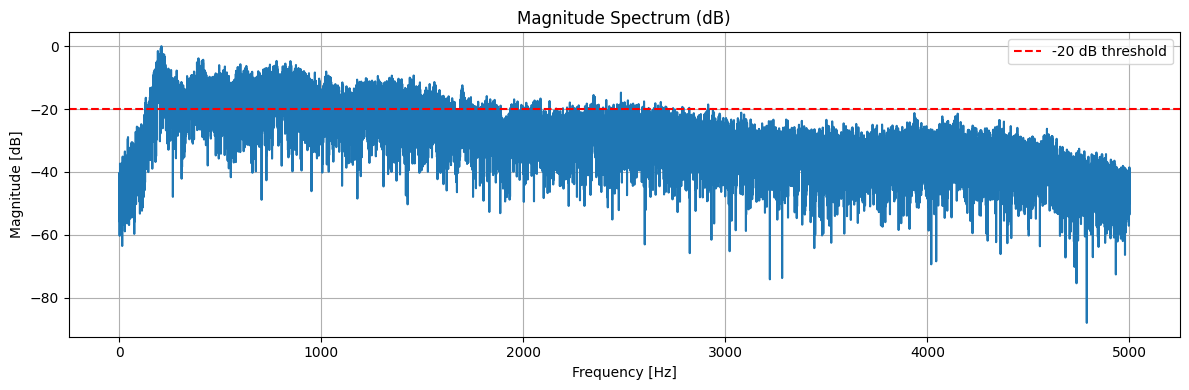

In [18]:
# Convert magnitude to decibels
magnitude_db = 20 * np.log10(magnitude / np.max(magnitude))

# Threshold to determine significant frequencies
threshold_db = -20  # dB threshold (adjustable)

# Identify frequency range with magnitude above threshold
significant_freqs = freqs[magnitude_db > threshold_db]

# Estimate bandwidth
bandwidth = significant_freqs[-1] - significant_freqs[0]
lower_freq = significant_freqs[0]
upper_freq = significant_freqs[-1]

print(f"Estimated Voice Bandwidth: {bandwidth:.2f} Hz")
print(f"Frequency Range: {lower_freq:.2f} Hz to {upper_freq:.2f} Hz")

# Plot magnitude spectrum in dB
plt.figure(figsize=(12, 4))
plt.plot(freqs, magnitude_db)
plt.axhline(y=threshold_db, color='red', linestyle='--', label=f'{threshold_db} dB threshold')
plt.title("Magnitude Spectrum (dB)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
# Get frequency axis for FFT result
freqs = np.fft.fftfreq(N, d=1/sample_rate)

# Use only positive frequencies
mask = freqs >= 0
freqs = freqs[mask]
fft_magnitude = np.abs(fft_result[mask])

# Convert to dB scale
fft_magnitude_db = 20 * np.log10(fft_magnitude / np.max(fft_magnitude))

# Find dominant (carrier) frequency
carrier_index = np.argmax(fft_magnitude)
carrier_freq = freqs[carrier_index]

# Estimate modulated bandwidth
threshold_db = -40  # dB cutoff for significant sidebands
significant_freqs = freqs[fft_magnitude_db > threshold_db]
bandwidth = significant_freqs[-1] - significant_freqs[0]
lower_freq = significant_freqs[0]
upper_freq = significant_freqs[-1]

# Display results
print(f"Dominant Frequency ≈ {carrier_freq:.2f} Hz")
print(f"Estimated Modulated Bandwidth ≈ {bandwidth:.2f} Hz")
print(f"Sideband Frequency Range ≈ {lower_freq:.2f} Hz to {upper_freq:.2f} Hz")


Dominant Frequency ≈ 209.67 Hz
Estimated Modulated Bandwidth ≈ 7723.14 Hz
Sideband Frequency Range ≈ 4.82 Hz to 7727.96 Hz


In [20]:
A_m = np.max(np.abs(data))  # Peak amplitude of message signal
A_c = 1  # Normalized peak amplitude of carrier (assumed)

f_m = 3400  # Max frequency in the message signal (Hz)
B = 2 * f_m  # Theoretical AM bandwidth

print(f"Amplitude of the message signal (A_m): {A_m}")
print(f"Peak amplitude of the carrier (A_c): {A_c}")
print(f"Estimated bandwidth of the AM signal: {B} Hz")


Amplitude of the message signal (A_m): 22878
Peak amplitude of the carrier (A_c): 1
Estimated bandwidth of the AM signal: 6800 Hz


Estimated Bandwidth: 2332.92 Hz


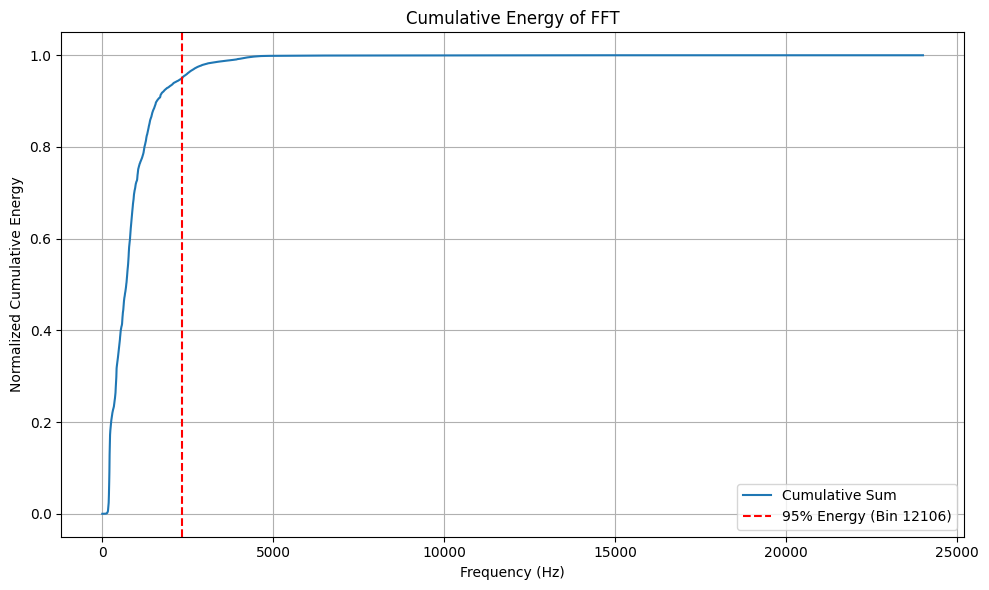

In [21]:
# Compute real FFT and magnitude
fft_signal = np.fft.rfft(data)
fft_magnitude = np.abs(fft_signal)

# Energy calculation
squared_magnitude = np.square(fft_magnitude)
cumulative_sum = np.cumsum(squared_magnitude)
total_energy = cumulative_sum[-1]
normalized_cumulative_sum = cumulative_sum / total_energy

# Find frequency bin that holds 95% of total energy
target_energy = 0.95
bin_index = np.where(normalized_cumulative_sum >= target_energy)[0][0]
bandwidth = bin_index / N * sample_rate

# Output estimated bandwidth
print(f"Estimated Bandwidth: {bandwidth:.2f} Hz")

# Plot cumulative energy
plt.figure(figsize=(10, 6))
freq_bins = np.linspace(0, sample_rate / 2, len(squared_magnitude))
plt.plot(freq_bins, normalized_cumulative_sum, label="Cumulative Sum")
plt.axvline(freq_bins[bin_index], color='r', linestyle='--', label=f"95% Energy (Bin {bin_index})")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Cumulative Energy")
plt.title("Cumulative Energy of FFT")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


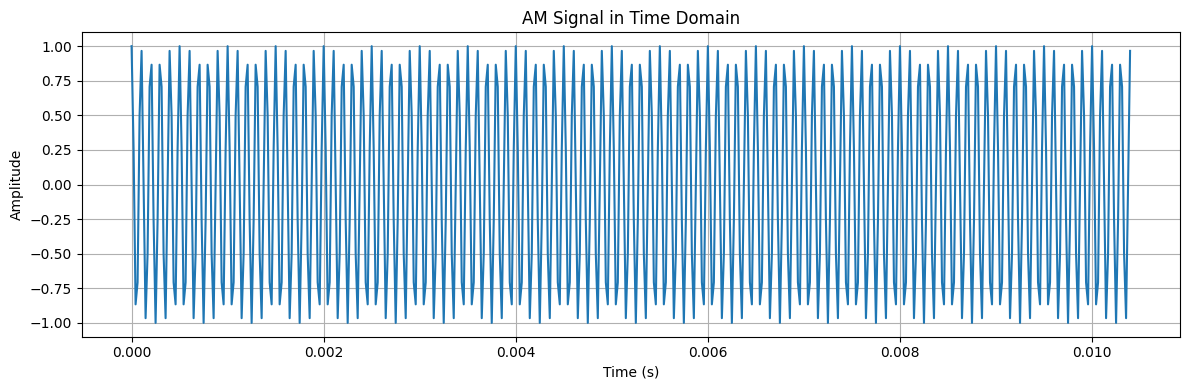

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

# Step 1: Load message signal
base_path = "/kaggle/input/sports-wav"
file_list = os.listdir(base_path)
file_path = os.path.join(base_path, file_list[0])  # Use first WAV file in the folder

fs, message = wavfile.read(file_path)

# Convert to mono if stereo
if len(message.shape) == 2:
    message = message.mean(axis=1)

# Normalize message signal (optional)
message = message / np.max(np.abs(message))  # Now -1 ≤ m(t) ≤ 1

# Step 2: Define AM parameters
mu = 1.0              # Modulation index
A_c = 1.0             # Carrier amplitude
f_c = 10000           # Carrier frequency in Hz

# Step 3: Generate time vector
t = np.arange(len(message)) / fs

# Step 4: Generate AM signal
am_signal = A_c * (1 + mu * message) * np.cos(2 * np.pi * f_c * t)

# Step 5: Plot time-domain AM signal
plt.figure(figsize=(12, 4))
plt.plot(t[:500], am_signal[:500])  # Show only small segment for clarity
plt.title("AM Signal in Time Domain")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()


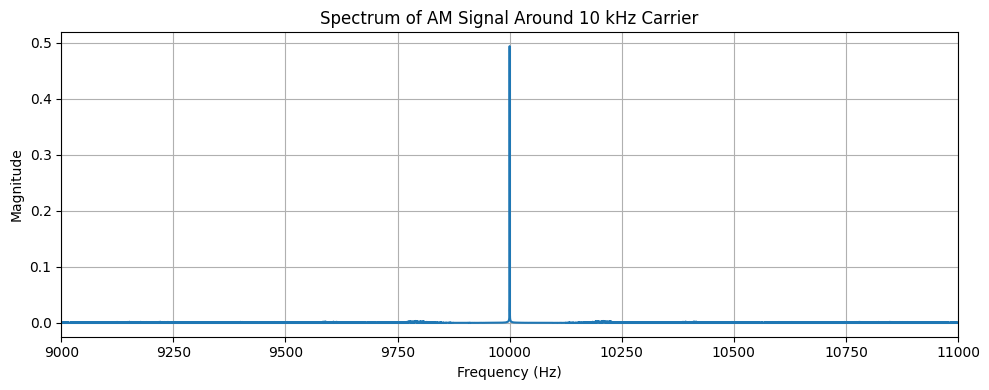

In [35]:
N = len(am_signal)
fft_am = np.fft.fft(am_signal)
fft_am = np.abs(fft_am) / N  # Normalize magnitude

# Frequency axis
freqs = np.fft.fftfreq(N, d=1/fs)

# Keep only positive frequencies
half_N = N // 2
fft_am = fft_am[:half_N]
freqs = freqs[:half_N]

# Plot zoomed-in frequency spectrum around carrier
plt.figure(figsize=(10, 4))
plt.plot(freqs, fft_am)
plt.xlim(9000, 11000)  # Focus around 10 kHz
plt.title("Spectrum of AM Signal Around 10 kHz Carrier")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()


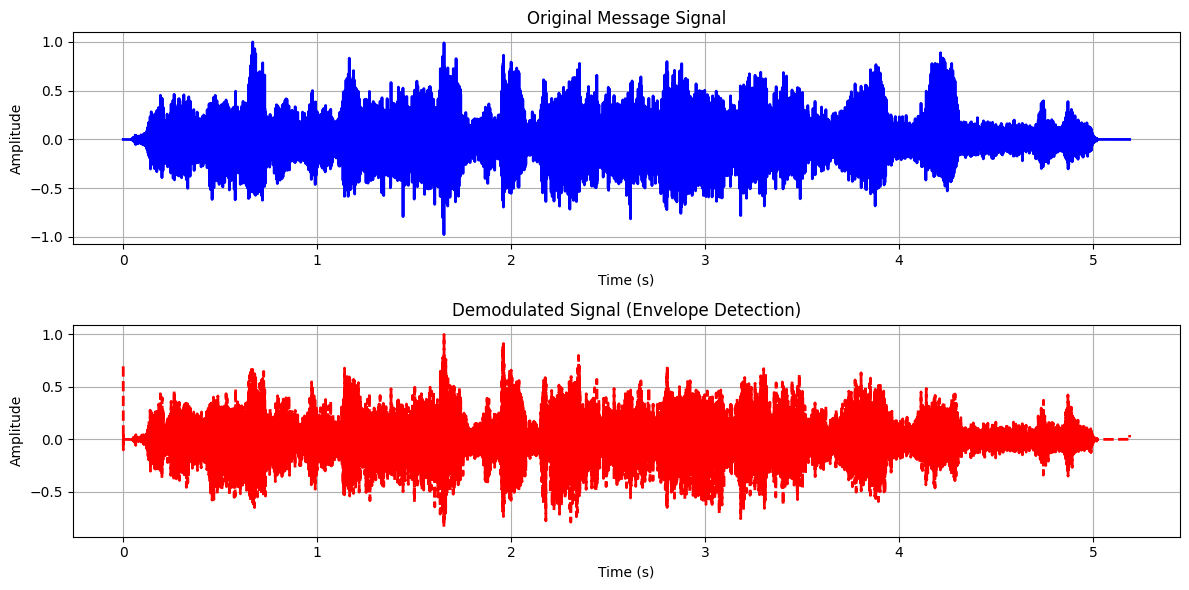

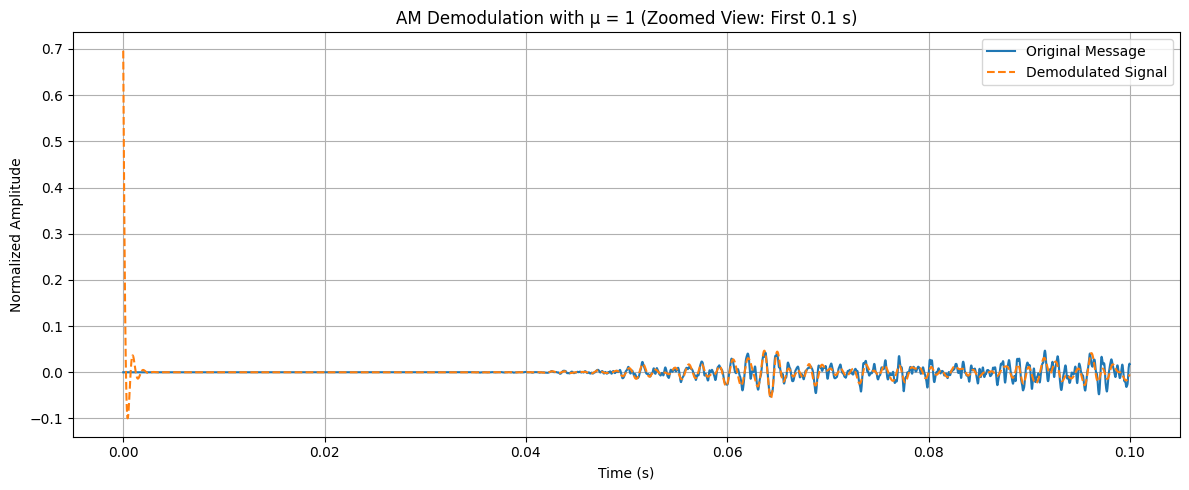

In [41]:
# Step 1: Envelope detection via rectification
rectified = np.abs(am_signal)

# Step 2: Low-pass filter to recover message
from scipy.signal import butter, filtfilt

def lowpass_filter(signal, cutoff_freq, fs, order=5):
    nyq = 0.5 * fs
    norm_cutoff = cutoff_freq / nyq
    b, a = butter(order, norm_cutoff, btype='low')
    return filtfilt(b, a, signal)

cutoff = 1000  # Hz cutoff for message bandwidth
demodulated = lowpass_filter(rectified, cutoff, fs)
demodulated -= np.mean(demodulated)  # Remove DC offset

# Step 3: Normalize both signals
message_norm = message / np.max(np.abs(message))
demodulated_norm = demodulated / np.max(np.abs(demodulated))

# Step 4: Time vector for zoomed-in view
zoom_duration = 0.1  # seconds
zoom_samples = int(zoom_duration * fs)
t_zoom = t[:zoom_samples]

# Step 5: Plot full comparison
plt.figure(figsize=(12, 6))

# Original message
plt.subplot(2, 1, 1)
plt.plot(t, message_norm, color='blue', linewidth=2)
plt.title("Original Message Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

# Demodulated signal
plt.subplot(2, 1, 2)
plt.plot(t, demodulated_norm, color='red', linestyle='--', linewidth=2)
plt.title("Demodulated Signal (Envelope Detection)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 6: Zoomed-in plot
plt.figure(figsize=(12, 5))
plt.plot(t_zoom, message_norm[:zoom_samples], label="Original Message", linewidth=1.5)
plt.plot(t_zoom, demodulated_norm[:zoom_samples], label="Demodulated Signal", linestyle='--', linewidth=1.5)
plt.title("AM Demodulation with µ = 1 (Zoomed View: First 0.1 s)")
plt.xlabel("Time (s)")
plt.ylabel("Normalized Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
